In [1]:
%run BI_df.py
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

   #Branch Loans  #Calls  #Contacts  #Devices  #Expenditures  #Incoming Amts  \
0              1     182        246         1              8               1   
1              2    1423         88         1             16               7   
2              1     442        200         1              3               1   
3              1    1775        711         1              5               8   
4              4    2356        128         1             95              82   

   #MSHWARI Loans  #Texts  %Successful Transactions  Average TalkTime (mins)  \
0               0     133                 62.500000                 0.505879   
1               0    3773                 76.551724                 1.064708   
2               1     125                 73.584906                 0.420475   
3               1   10522                 75.392670                 1.145617   
4               0    1654                 83.255814                 0.563001   

    ...    Max MSHWARI Balance  Max MS

/Users/yashevde/miniconda3/envs/pYash/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print(len(list(df)))
print(list(df))

36
['#Branch Loans', '#Calls', '#Contacts', '#Devices', '#Expenditures', '#Incoming Amts', '#MSHWARI Loans', '#Texts', '%Successful Transactions', 'Average TalkTime (mins)', 'Avg Branch Installment', 'Avg Branch Loan', 'Avg Expenditure', 'Avg Incoming Amt', 'Avg MPESA Balance', 'Avg MSHWARI Balance', 'Avg MSHWARI Loan', 'Burn Rate', 'Competition', 'Day/Night Call ratio', 'Day/Night Text ratio', 'MPESA Limit', 'Max Branch Loan', 'Max Expenditure', 'Max Incoming Amt', 'Max MPESA Balance', 'Max MSHWARI Balance', 'Max MSHWARI Loan', 'Min Branch Loan', 'Min Expenditure', 'Min Incoming Amt', 'Total Expenditure', 'Total Income', 'Total MSHWARI Loans', 'Total TalkTime (hrs)', 'status']


# An Exploration of Branch Data 

## Yash Shevde

# Handling the data

<img src="./imgs/data1.png" />

<img src="./imgs/data2.png" />

<img src="./imgs/data3.png" />

### Features


###### #Branch Loans, #Calls, #Contacts, #Devices, #Expenditures, #Incoming Amts, #MSHWARI Loans, #Texts, %Successful Transactions, Average TalkTime (mins), Avg Branch Installment, Avg Branch Loan, Avg Expenditure, Avg Incoming Amt, Avg MPESA Balance, Avg MSHWARI Balance, Avg MSHWARI Loan, Burn Rate, Day/Night Call ratio, Day/Night Text ratio, MPESA Limit, MSHWARI Competition, Max Branch Loan, Max Expenditure, Max Incoming Amt, Max MPESA Balance, Max MSHWARI Balance, Max MSHWARI Loan, Min Branch Loan, Min Expenditure, Min Incoming Amt, Total Expenditure, Total Income, Total MSHWARI Loans, Total TalkTime (hrs), status

### 1st Branch
#### aspects of the data file structure and files

* #Calls
* #Texts
* #Contacts
* #Devices
* status

### 2nd Branch
#### some operation conducted on the previous features 

* Day/Night Call ratio
* Day/Night Text ratio

#### deeper dive into file info

* Total TalkTime (hrs)
* Average TalkTime (mins)

#### Lot of the financial info parsed from texts

* #Branch Loans 
* #Expenditures 
* #Incoming Amts 
* #MSHWARI Loans

# Day/Night ratios
<img src="./imgs/dn.png" />

# TalkTime
<img src="./imgs/tt.png" />

# Financial Info
<img src="./imgs/fin.png" />

### 3rd Branch

#### operations on the financial info

* Avg Branch Installment
* Avg Branch Loan 
* Avg Expenditure 
* Avg Incoming Amt 
* Avg MPESA Balance 
* Avg MSHWARI Balance 
* Avg MSHWARI Loan 
* MPESA Limit 
* Max Branch Loan 
* Max Expenditure 
* Max Incoming Amt 
* Max MPESA Balance 
* Max MSHWARI Balance 
* Max MSHWARI Loan 
* Min Branch Loan 
* Min Expenditure 
* Min Incoming Amt 
* Total Expenditure 
* Total Income 
* Total MSHWARI Loans 

### 4th Branch

#### motivated by some hypothesis

* Burn Rate
* Competition
* %Successful Transactions

* Burn Rate
<img src="./imgs/burn.png" />

* Competition
<img src="./imgs/comp.png" />

* %Successful Transactions
<img src="./imgs/suc.png" />

### potential features

#### the ones I didn't get around to due to data or time constraints

* network within set of users cross referenced with status
* degree assortativity

#### had some intuition about them not being worth the time

* mixed language analysis

#### ~~had some intuition about them not being worth the time~~

* mixed language analysis

###### ( ^ maybe just what I told myself bc I haven't become efficient with the skills)

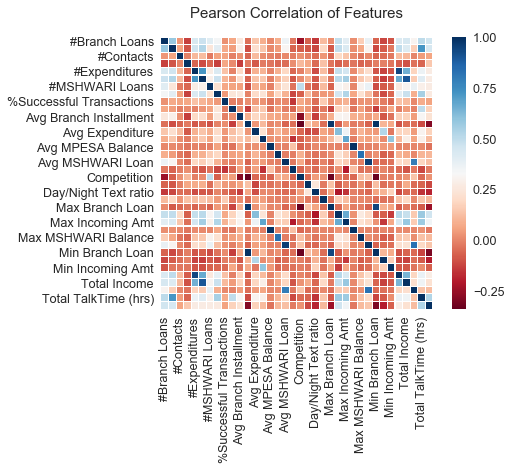

In [14]:
plt.figure(figsize=(7,5))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
all_features = df.corr()
sns.heatmap(all_features.astype(float), linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=False)

# even and non-overlapping info content across the board. minimize collinearity.

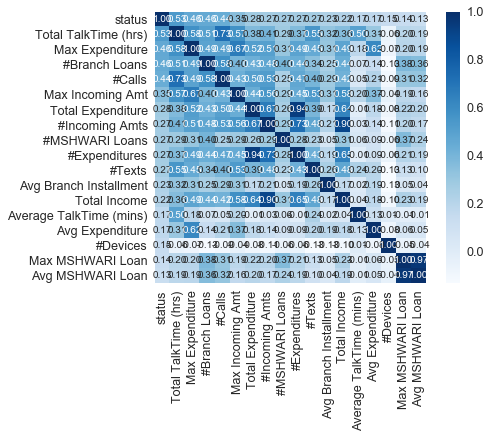

In [15]:
k = 18
plt.figure(figsize=(7,5))
cols = all_features.nlargest(k, 'status')['status'].index 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Blues', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

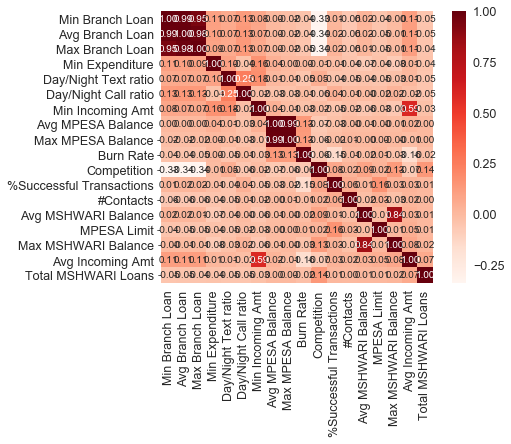

In [16]:
k = 18
plt.figure(figsize=(7,5))
cols = all_features.nsmallest(k, 'status')['status'].index 
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Reds', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
#minimizing collinearity with this selection of cols
fields = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'Competition', '#Texts','#Devices']
le = LabelEncoder()
for f in fields:
    df[f] = le.fit_transform(df[f])
    
def classification_model(model, data, predictors, target):

    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[target])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:

        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[target].iloc[train]
    
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[target].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    model.fit(data[predictors],data[target]) 

# Decision Tree Classifier

In [11]:
target = 'status'
model = DecisionTreeClassifier()
predictors = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'Competition', '#Texts','#Devices']
classification_model(model, train, predictors, target)

#accuracy up, CV score down: overfitting

contribution = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(contribution)

Accuracy : 100.000%
Cross-Validation Score : 75.000%
#Branch Loans             0.325186
Total TalkTime (hrs)      0.286410
Max Expenditure           0.142891
#Texts                    0.124275
Max Incoming Amt          0.056217
#Devices                  0.036867
Avg Branch Installment    0.028154
Competition               0.000000
dtype: float64


# Random Forest Classifier

In [12]:
target = 'status'
model = RandomForestClassifier()
predictors = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'Competition', '#Texts','#Devices']
classification_model(model, train, predictors, target)

#still over fit. tune parameters, reduce n_predictors

contribution = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(contribution)

Accuracy : 97.500%
Cross-Validation Score : 76.250%
Total TalkTime (hrs)      0.326085
Max Expenditure           0.142437
#Branch Loans             0.139519
#Texts                    0.117628
Max Incoming Amt          0.109723
Avg Branch Installment    0.093024
#Devices                  0.038335
Competition               0.033249
dtype: float64


In [13]:
target = 'status'
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictors = ['Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 'Max Incoming Amt', 
          'Avg Branch Installment', 'Competition', '#Texts','#Devices']
classification_model(model, train, predictors, target)

#generalizing well. expected higher CV score

contribution = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(contribution)

Accuracy : 85.000%
Cross-Validation Score : 77.500%
Total TalkTime (hrs)      0.222861
#Branch Loans             0.205365
Avg Branch Installment    0.147711
Max Incoming Amt          0.122386
Max Expenditure           0.117147
#Texts                    0.116573
#Devices                  0.036773
Competition               0.031185
dtype: float64


/Users/yashevde/miniconda3/envs/pYash/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/yashevde/miniconda3/envs/pYash/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


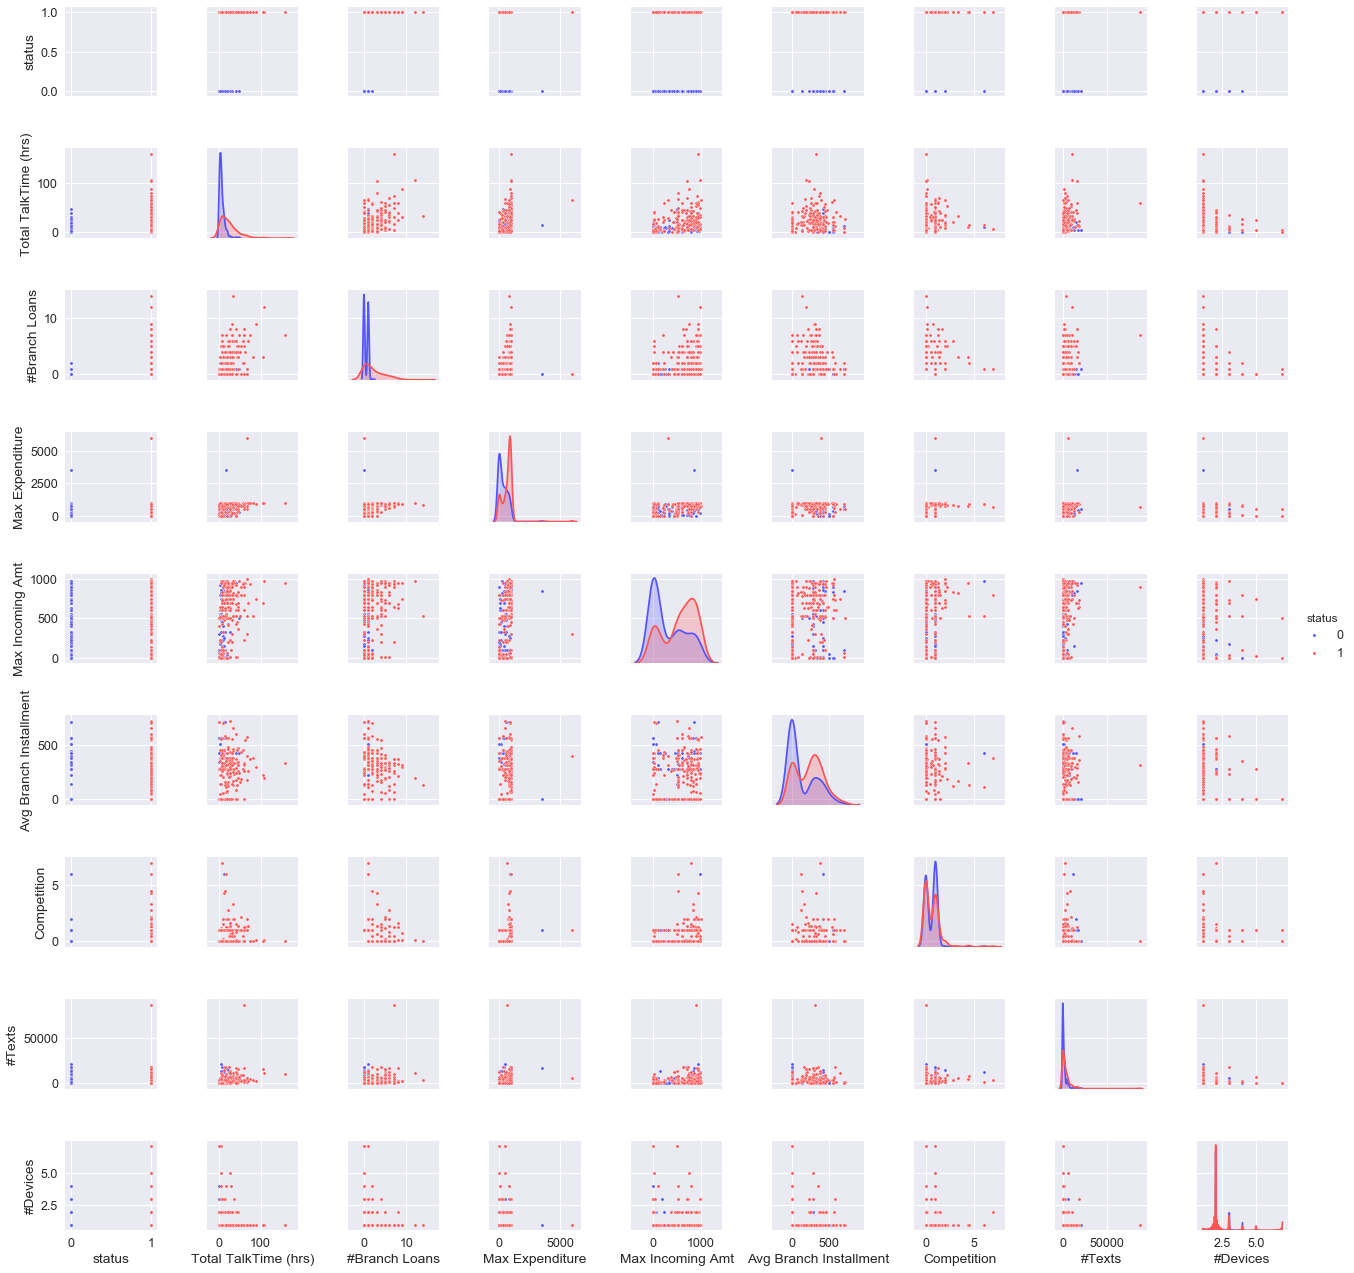

In [7]:

pairs = ['status', 'Total TalkTime (hrs)','#Branch Loans', 'Max Expenditure', 
         'Max Incoming Amt', 'Avg Branch Installment', 'Competition', '#Texts',
         '#Devices'] 

sns.pairplot(df[pairs], size=2.0, hue='status', palette = 'seismic',diag_kind = 'kde',diag_kws=dict(shade=True),
             plot_kws=dict(s=10) )